# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

Importerer python fil

In [6]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject_MP as ip

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**



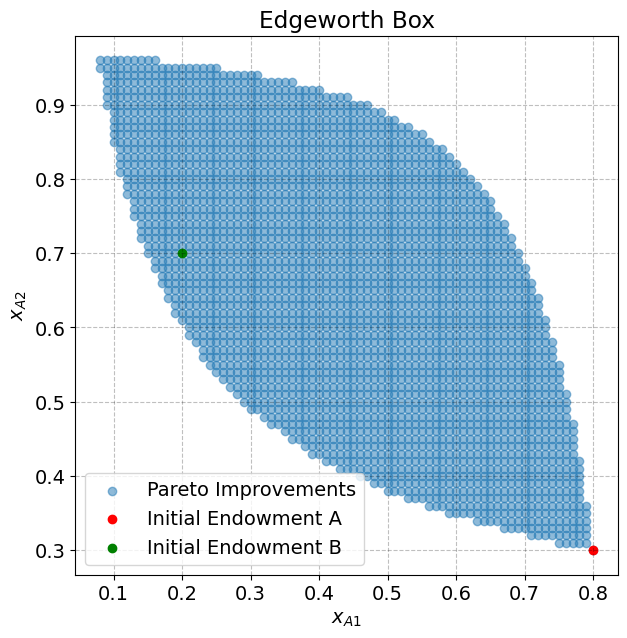

In [16]:
# code for solving the model (remember documentation and comments)

import numpy as np
import matplotlib.pyplot as plt

# First we define parameters
alpha = 1/3 #alpha is the weight of good 1 in the utility function of agent A
beta = 2/3 #beta is the weight of good 1 in the utility function of agent B
omega_A1 = 0.8 #omega_A1 is the initial endowment of good 1 for agent A
omega_A2 = 0.3 #omega_A2 is the initial endowment of good 2 for agent A
p2 = 1  # Numeraire price of good 2
N = 100 #N is the number of points in the grid

# Utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha) #utility function of agent A

def uB(x1, x2):
    return x1**beta * x2**(1-beta) #utility function of agent B

# Demand functions
def demand_A(p1, omega_A1=omega_A1, omega_A2=omega_A2):
    budget = omega_A1 * p1 + omega_A2 * p2
    xA1_star = alpha * budget / p1
    xA2_star = (1 - alpha) * budget / p2
    return xA1_star, xA2_star

def demand_B(p1, omega_B1=1-omega_A1, omega_B2=1-omega_A2):
    budget = omega_B1 * p1 + omega_B2 * p2
    xB1_star = beta * budget / p1
    xB2_star = (1 - beta) * budget / p2
    return xB1_star, xB2_star

# Initial utilities
initial_uA = uA(omega_A1, omega_A2) #utility of agent A with initial endowment
initial_uB = uB(1-omega_A1, 1-omega_A2) #utility of agent B with initial endowment

# Generating Pareto improvements
pareto_improvements = [] #list to store Pareto improvements
for xA1 in np.linspace(0, 1, N+1): #loop over all possible allocations of good 1 for agent A
    for xA2 in np.linspace(0, 1, N+1): #loop over all possible allocations of good 2 for agent A
        xB1 = 1 - xA1 #allocation of good 1 for agent B
        xB2 = 1 - xA2 #allocation of good 2 for agent B
        if uA(xA1, xA2) >= initial_uA and uB(xB1, xB2) >= initial_uB: #checking if the allocation is a Pareto improvement
            pareto_improvements.append((xA1, xA2)) #adding the allocation to the list of Pareto improvements

# Converting list of tuples to numpy array for plotting
pareto_improvements_np = np.array(pareto_improvements) 

# Plotting the Edgeworth Box
plt.figure(figsize=(7, 7)) #setting the size of the plot
plt.scatter(pareto_improvements_np[:, 0], pareto_improvements_np[:, 1], alpha=0.5, label='Pareto Improvements') 
plt.scatter([omega_A1], [omega_A2], color='red', label='Initial Endowment A') #plotting the initial endowment of agent A
plt.scatter([1-omega_A1], [1-omega_A2], color='green', label='Initial Endowment B') #plotting the initial endowment of agent B
plt.xlabel('$x_{A1}$') #setting the label of the x-axis
plt.ylabel('$x_{A2}$') #setting the label of the y-axis
plt.title('Edgeworth Box') #setting the title of the plot
plt.legend() #adding a legend to the plot
plt.grid(True) #adding a grid to the plot
plt.show() #displaying the plot


# Question 2

Now we calculate the error in the market clearing conditions. That is we examine how far the market is from equilibrium for each price p_1 within P1


In [25]:
# Range of prices p1 to consider
N_p1 = 75 # Number of points in the grid
p1_values = np.linspace(0.5, 2.5, N_p1) 

# Function to calculate market clearing errors
def market_clearing_errors(p1): 
    xA1_star, xA2_star = demand_A(p1) #demand of agent A
    xB1_star, xB2_star = demand_B(p1) #demand of agent B
    epsilon1 = xA1_star + xB1_star - (omega_A1 + (1-omega_A1)) #market clearing error for good 1
    epsilon2 = xA2_star + xB2_star - (omega_A2 + (1-omega_A2)) #market clearing error for good 2
    return epsilon1, epsilon2 #returning the market clearing errors

# Calculate and store the errors for each p1
errors = [market_clearing_errors(p1) for p1 in p1_values] #list of market clearing errors for each p1

# Separate the errors for easy plotting or analysis
epsilon1_values, epsilon2_values = zip(*errors)


# Question 3

Now we find the market clearing price by minimizing the errors 

In [30]:
from scipy.optimize import minimize_scalar

# Objective function to minimize (absolute value of epsilon1, assuming market clearing for one good implies market clearing for the other)
def objective(p1):
    epsilon1, _ = market_clearing_errors(p1)
    return np.abs(epsilon1)

# Use minimize_scalar to find the market clearing price p1
result = minimize_scalar(objective, bounds=(0.5, 2.5), method='bounded') #minimizing the objective function

# Extract the optimal price p1
market_clearing_p1 = result.x #extracting the market clearing price

print(f"Market Clearing Price p1: {market_clearing_p1}") #printing the market clearing price

# Calculate the allocation at the market-clearing price
xA1_market_clearing, xA2_market_clearing = demand_A(market_clearing_p1)
xB1_market_clearing, xB2_market_clearing = demand_B(market_clearing_p1)

# Save the allocation at this price
allocation_at_clearing_price = {
    'market_clearing_price': market_clearing_p1,
    'xA1': xA1_market_clearing,
    'xA2': xA2_market_clearing,
    'xB1': xB1_market_clearing,
    'xB2': xB2_market_clearing
}

print("Allocation at market-clearing price:")
print(allocation_at_clearing_price)

Market Clearing Price p1: 0.9444438969772826
Allocation at market-clearing price:
{'market_clearing_price': 0.9444438969772826, 'xA1': 0.37254908098482, 'xA2': 0.7037034117212174, 'xB1': 0.627451266818049, 'xB2': 0.2962962597984855}


ADD CONCISE CONLUSION.